## Retail


### Week 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skewnorm
import scipy.stats as stats  
from sklearn.preprocessing import LabelEncoder
import pylab as p  
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning

### a)  Check For missing Data and formulate an apt strategy to treat them.

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dropna(subset=['CustomerID'], inplace=True)

In [6]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## b) Remove duplicate data records.

In [7]:
df.duplicated().sum()

5225

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

## c) Perform descriptive analytics on the given data.

### Country

In [10]:
pd.DataFrame(df['Country'].unique())

,0
0,United Kingdom
1,France
2,Australia
3,Netherlands
4,Germany
5,Norway
6,EIRE
7,Switzerland
8,Spain
9,Poland


### Total Customers

In [11]:
len(df['CustomerID'].unique())

4372

### Majority of Customer country wise

In [12]:
c=pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())

In [13]:
customercoutrywise=pd.DataFrame(c).sort_values(by='CustomerID', ascending=False)

In [14]:
customercoutrywise

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


### Customer Order More than one item


In [15]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')


69.97% of customers ordered more than one item.


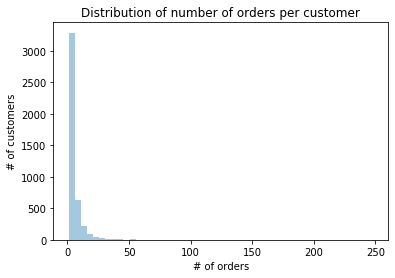

In [16]:

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');
                    

# Data Transformation
## Cohort Analysis


In [17]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')


In [18]:
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [19]:
df_cohort=pd.DataFrame(df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)) 

## a) Active customer each Cohort

In [20]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [21]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)


In [23]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


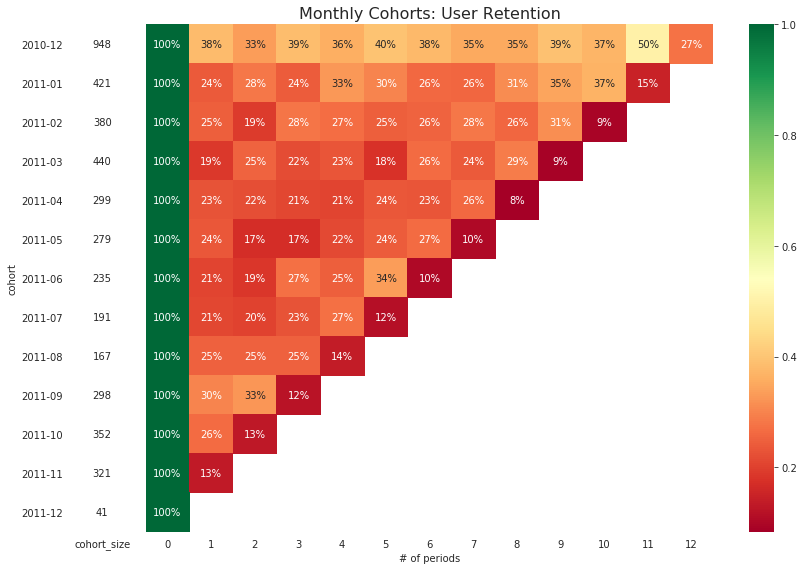

In [24]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

## Week 2 

Build RFM model 

In [25]:
df['InvoiceDate'].max()


Timestamp('2011-12-09 12:50:00')

Latest Date is 2011-12-09 so in order to calculate recency we will use 2011-12-10

### RFM metrics

In [26]:
latestdate = dt.datetime(2011,12,10)
rfmtable=df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latestdate - x.max()).days, 'InvoiceNo': lambda x: len(x),'UnitPrice': lambda x: x.sum()})
rfmtable=rfmtable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'UnitPrice': 'monetary_value'})
rfmtable

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,2,2.08
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,18,73,605.10
12350.0,310,17,65.30
...,...,...,...
18280.0,277,10,47.65
18281.0,180,7,39.36
18282.0,7,13,62.68


## RFM segments
Quantile

In [27]:
quantiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()



{'recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'monetary_value': {0.25: 52.730000000000004, 0.5: 128.925, 0.75: 299.0975}}

In [28]:
segmented_rfm = rfmtable

Recency must be low

In [29]:
def recencyscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1    
    

In [30]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(recencyscore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(fmscore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(fmscore, args=('monetary_value',quantiles,))


segmented_rfm.head()


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,2.08,4,4,4
12347.0,2,182,481.21,1,1,1
12348.0,75,31,178.71,3,3,2
12349.0,18,73,605.10,2,2,1
12350.0,310,17,65.30,4,4,3


In [41]:
segmented_rfm.to_csv('SegmentedRFM.csv')
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)

segmented_rfm.head()


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,2,2.08,4,4,4,444
12347.0,2,182,481.21,1,1,1,111
12348.0,75,31,178.71,3,3,2,332
12349.0,18,73,605.10,2,2,1,221
12350.0,310,17,65.30,4,4,3,443


### Customer Segementation according to RFM

In [32]:
pd.set_option("display.max_colwidth", 10000)
data = {'Customer Segement':['Best Customers', 'Loyal Customers', 'Big Spender', 'Almost Lost','Lost Customers','Lost Cheap Customers'], 'RFM':['111', 'X1X', 'XX1', '311','411','444'],'Desrciption':['Bought Most Recently and More Often', 'Buy Most Frequently', 'Spend The Most', 'Did not purchased for some time but purchased frequently and most','Did not purchased for some time but purchased frequently and most','Last purchased long ago,purchased few and spent little']}
pd.DataFrame(data)

,Customer Segement,RFM,Desrciption
0,Best Customers,111,Bought Most Recently and More Often
1,Loyal Customers,X1X,Buy Most Frequently
2,Big Spender,XX1,Spend The Most
3,Almost Lost,311,Did not purchased for some time but purchased frequently and most
4,Lost Customers,411,Did not purchased for some time but purchased frequently and most
5,Lost Cheap Customers,444,"Last purchased long ago,purchased few and spent little"


## Week 3

Clustering using K-mean  

In [33]:
cluster = segmented_rfm
cluster = cluster.reset_index(level=0).iloc[:,[2,3]].values

pd.DataFrame(cluster)

,0,1
0,2.0,2.08
1,182.0,481.21
2,31.0,178.71
3,73.0,605.10
4,17.0,65.30
...,...,...
4367,10.0,47.65
4368,7.0,39.36
4369,13.0,62.68
4370,721.0,1174.33


In [34]:
sc= StandardScaler()
cluster = sc.fit_transform(cluster)

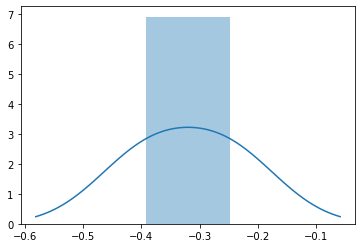

In [35]:
sns.distplot(cluster[0])

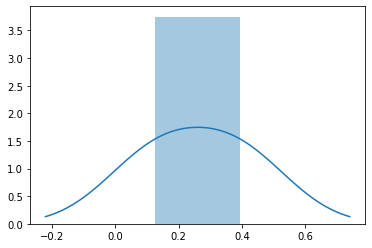

In [36]:
sns.distplot(cluster[1])

WCSS

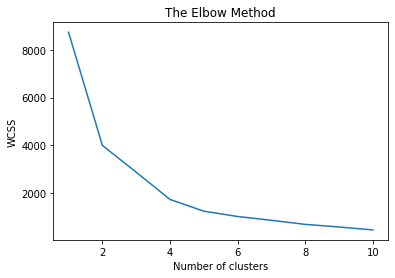

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters to be formed is 4

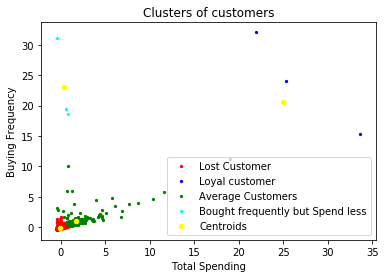

In [38]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(cluster)
plt.scatter(cluster[y_kmeans == 0, 0], cluster[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Lost Customer')
plt.scatter(cluster[y_kmeans == 1, 0], cluster[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Loyal customer')
plt.scatter(cluster[y_kmeans == 2, 0], cluster[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Average Customers')
plt.scatter(cluster[y_kmeans == 3, 0], cluster[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Bought frequently but Spend less')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Spending')
plt.ylabel('Buying Frequency')
plt.legend()
plt.show()